1.chương trình biến đổi ảnh

In [107]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd


(1427, 2100, 3)


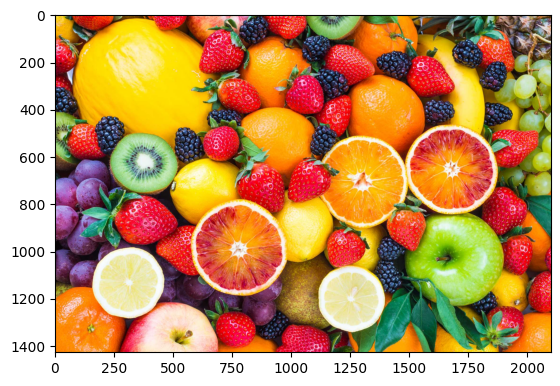

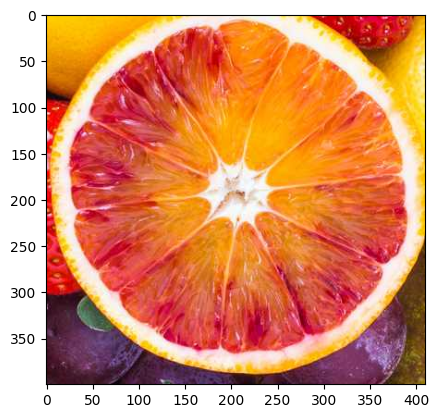

In [6]:
#1 chọn đối tượng trong ảnh

data = iio.imread('fruit.jpg')

# lấy toạ độ quả cam 
bmg = data[800:1200 , 570:980]
print(data.shape)

# lưu lại
iio.imsave('exercise/orange.jpg',bmg) 
plt.imshow(data)
plt.show()
plt.imshow(bmg)
plt.show()

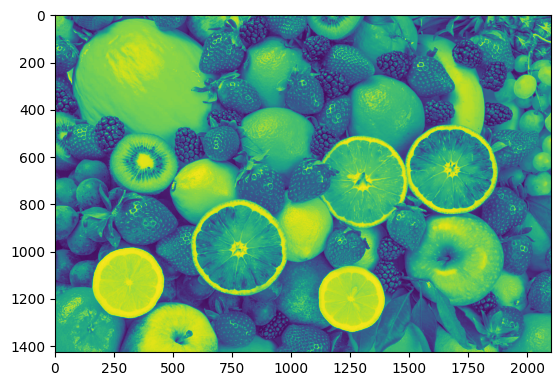

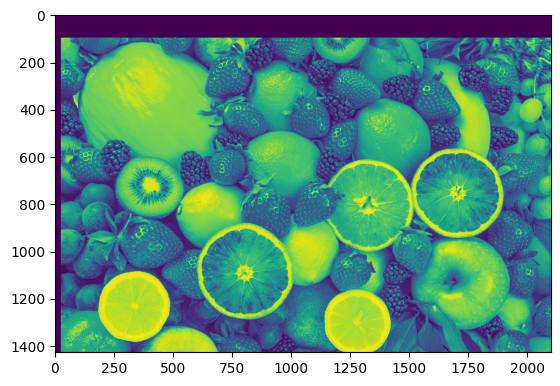

In [ ]:
#1.2 tịnh tiến đơn
data = iio.imread('fruit.jpg', mode='L')
bdata = nd.shift(data, (100,25))

plt.imshow(data)
plt.show()
plt.imshow(bdata)
plt.show()

(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)


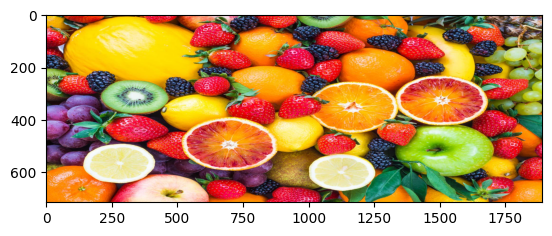

In [14]:
#1.3 thay đổi kích thước ảnh
data = iio.imread('fruit.jpg')
print(data.shape)

bdata = nd.zoom(data, 2)
print(bdata.shape)

bdata2 = nd.zoom(data, (2,2,1))
print(bdata2.shape)

bdata3 = nd.zoom(data, (0.5,0.9,1))
plt.imshow(bdata3)
plt.show()


(1427, 2100, 3)


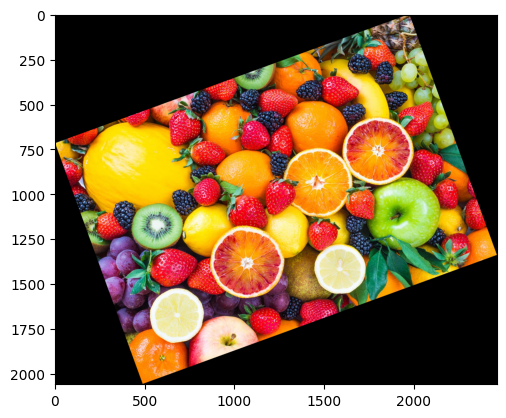

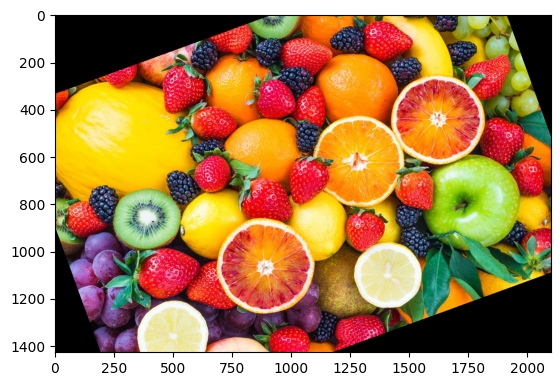

In [15]:
#1.4 xoay ảnh
# dùng hàm rotate(image,góc xoay) để xoay một ảnh mới

data = iio.imread('fruit.jpg')
print(data.shape)

d1 = nd.rotate(data, 20)    
plt.imshow(d1)
plt.show()

#góc xoay 20 độ
d2 = nd.rotate(data, 20 , reshape=False)
plt.imshow(d2)
plt.show()

(309, 515)


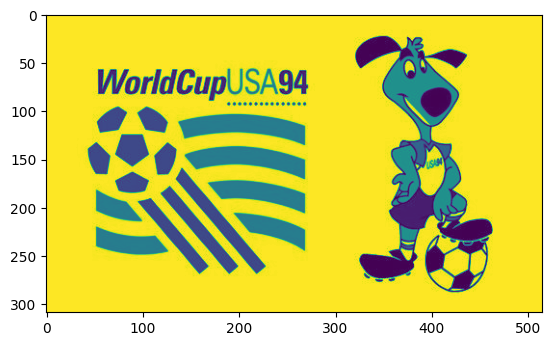

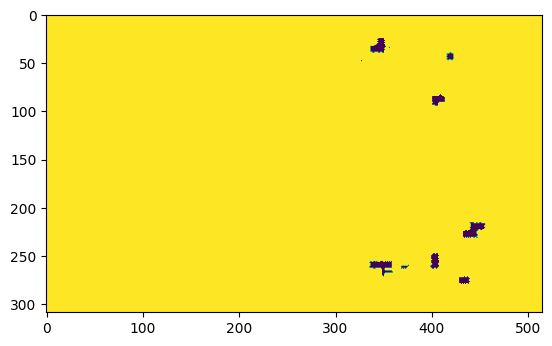

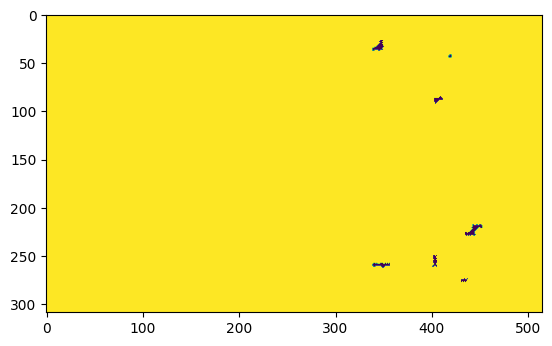

In [20]:
# 1.5 Dilation và Erosion
#   dùng để loại bỏ những pixel nhiễu.
#   Dilation thay thế pixel toạ độ(i,j) bằng giá trị lớn nhất của pixel cận 
#   Erosion thay thế pixel toạn độ(i,j) bằng giá trị nhỏ nhất của pixel cận
data = iio.imread('world_cup.jpg', mode='L')
print(data.shape)
plt.imshow(data)
plt.show()

d1 = nd.binary_dilation(data)
plt.imshow(d1)
plt.show()

d2 = nd.binary_dilation(data, iterations=3)
plt.imshow(d2)
plt.show()

(309, 515)


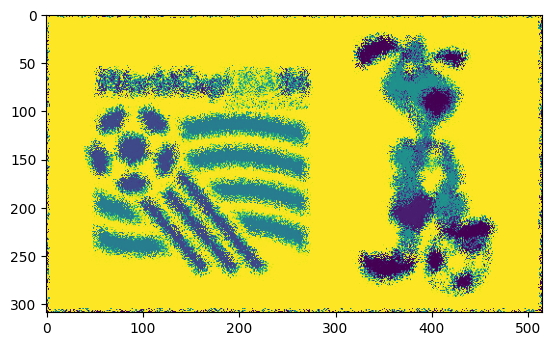

In [3]:
# 1.6 Coordinate Mapping 
#  cho phép tạo hàm mới do người dùng định nghĩa,ngoài các hàm có sẵn: shifting,rotate
data = iio.imread('world_cup.jpg', mode='F')
print(data.shape)
V, H = data.shape

M = np.indices((V,H))

d = 5
q = 2 * d * np.random.ranf(M.shape) - d
mp = (M + q).astype(int)

# hàm map_coordinate để ánh xạ vị trí mới cho ảnh đầu vào
d1 = nd.map_coordinates(data, mp)   
plt.imshow(d1)
plt.show()

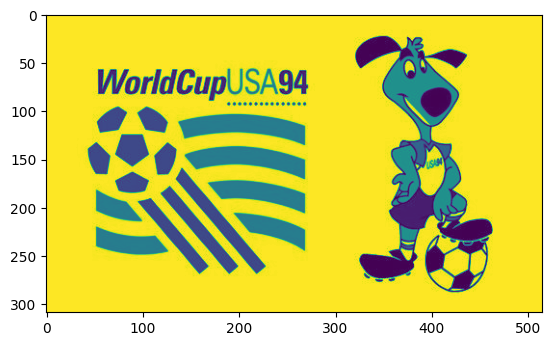

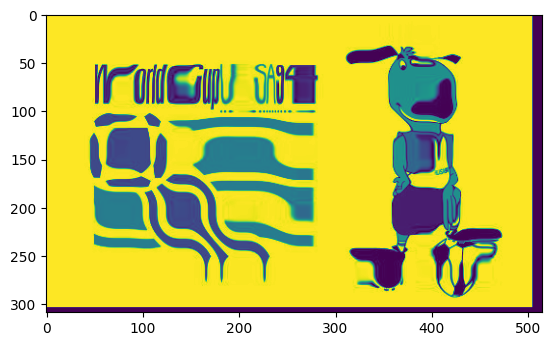

In [ ]:
#1.7 Biến đổi chung(generic transformation)
#   dùng khi ta muốn biến đổi các ảnh chung phép toán do người dùng định nghiã

def GeoFun(outcoord):
    a = 10 * np.cos(outcoord[0]/10) + outcoord[0]
    b = 10 * np.cos(outcoord[1]/10) + outcoord[1]
    return a, b

data = iio.imread('world_cup.jpg', mode='L')

d1 = nd.geometric_transform(data, GeoFun)
plt.imshow(data)
plt.show()
plt.imshow(d1)
plt.show()

Bai Tap

(1414, 2119, 3)


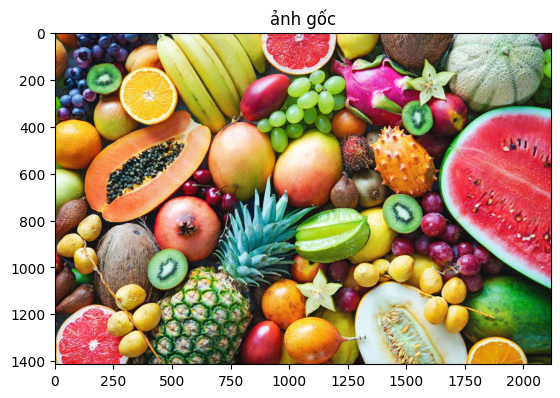

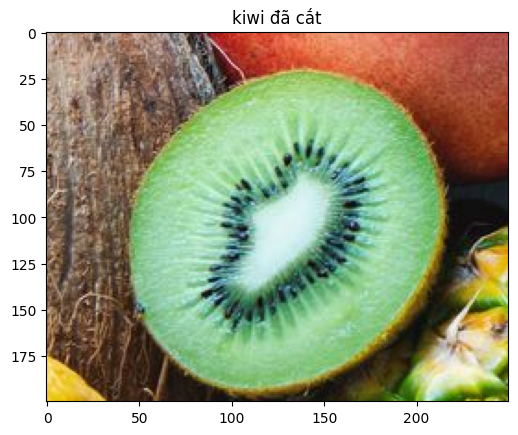

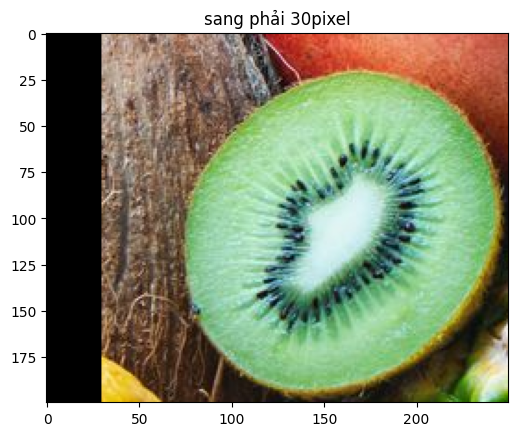

In [65]:
#BT1. mã chọn quả kiwi từ ảnh, tịnh tiến quả kiwi sang phải 30pixel.
data = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')
bmg = data[900:1100, 350:600]
print(data.shape)

iio.imsave('exercise/kiwi_cut_bt01.jpg', bmg)

kiwi = nd.shift(bmg, (0,30,0))

plt.title('ảnh gốc')
plt.imshow(data)
plt.show()
plt.title('kiwi đã cắt')
plt.imshow(bmg)
plt.show()
plt.title('sang phải 30pixel')
plt.imshow(kiwi)
plt.show()

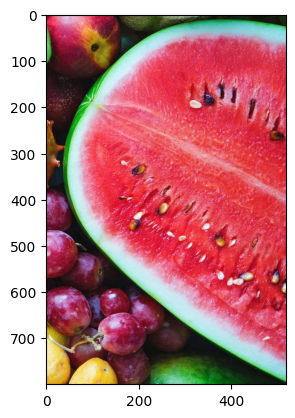

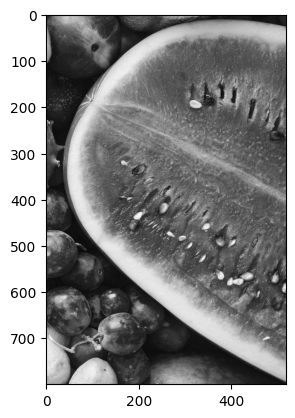

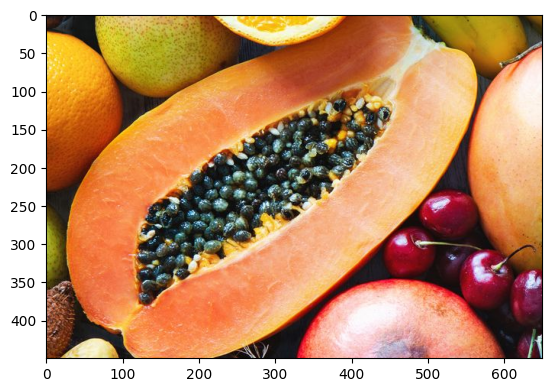

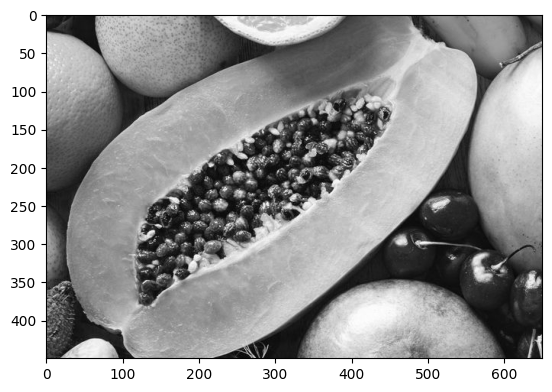

In [ ]:
# BT2: mã chọn quả đu đủ và dưa hấu từ ảnh colorful-ripe-tropical-fruits.jpg, 
# đổi màu hai đối tượng này. 
from skimage.color import rgb2gray
data = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')

dudu = data[350:800, 100:750]
duahau = data[300:1100, 1600:2500]

gray_dudu = rgb2gray(dudu)
gray_duahau = rgb2gray(duahau)
plt.imshow(duahau)
plt.show()
plt.imshow(gray_duahau, cmap='gray')
plt.show()
plt.imshow(dudu)
plt.show()
plt.imshow(gray_dudu, cmap='gray')
plt.show()

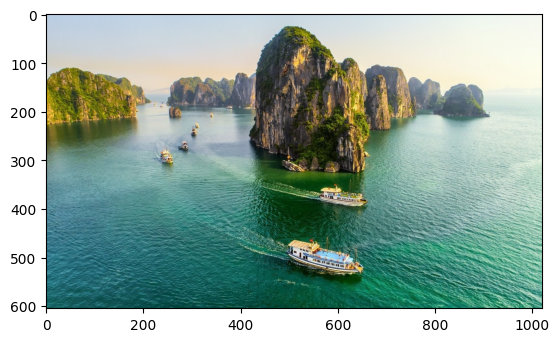

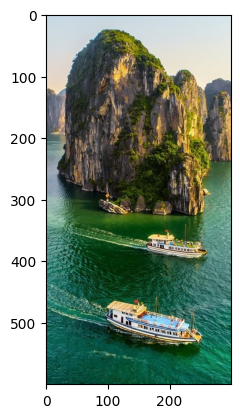

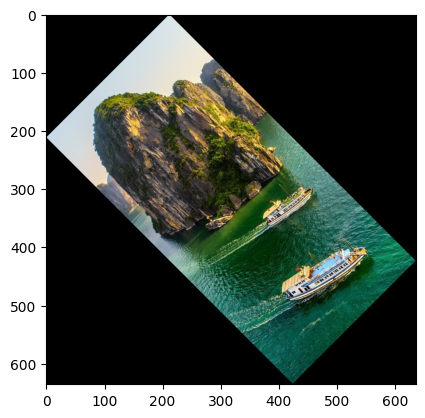

In [ ]:
#BT3 mã chọn ngọn núi và con thuyền từ ảnh quang_ninh.jpg, 
# xoay hai đối tượng này góc 45 độ, lưu ảnh
data = iio.imread('exercise/quang_ninh.jpg')
#print(data)

cut_image = data[0:600, 400:700]
d1 = nd.rotate(cut_image, 45)
iio.imsave('exercise/quang_ninh_cut_bt3.jpg',d1)

plt.imshow(data)
plt.show()
plt.imshow(cut_image)
plt.show()
plt.imshow(d1)
plt.show()

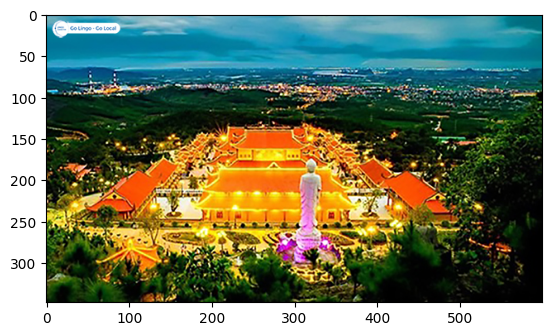

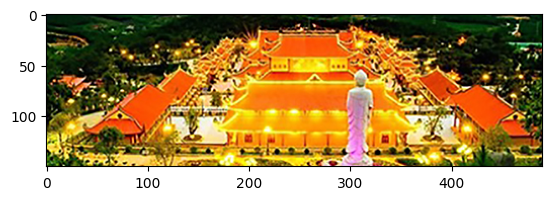

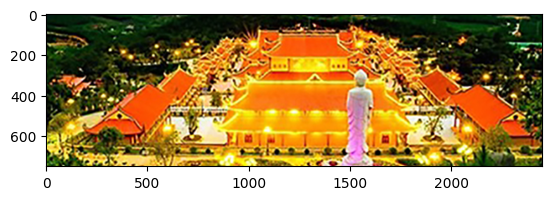

In [ ]:
#BT4 mã chọn ngôi chùa từ ảnh pagoda.jpg, tăng kích thước ảnh mới lên 5 lần, lưu ảnh
data = iio.imread('exercise/pagoda.jpg')

cut_pagoda = data[120:270, 10:500]
zoomx5 = nd.zoom(cut_pagoda, (5,5,1)) 

iio.imsave('exercise/pagoda_cut_zoomx5_bt4.jpg',zoomx5)
plt.imshow(data)
plt.show()
plt.imshow(cut_pagoda)
plt.show()
plt.imshow(zoomx5)
plt.show()

In [ ]:
#BT5: mã tạo menu:
#tịnh tiến ,xoay, phóng to, thu nhỏ, coordinate map
#khi chọn phím T,X,P,H,C thì hỏi muốn thực hiện ảnh nào từ 3 hình trong thư mục,
#người dùng chọnn hình nào thì thực hiện phép biến đổi trên hình đó.



Menu:
1. Tịnh tiến (Shift)
2. Xoay (Rotate)
3. Phóng to (Zoom in)
4. Thu nhỏ (Zoom out)
5. Coordinate Map
6. Xem ảnh gốc


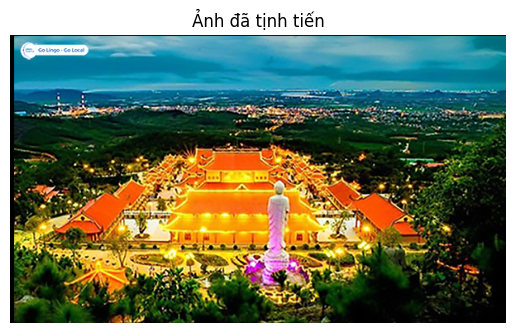

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import imageio.v3 as iio
from scipy import ndimage as nd

# Yêu cầu người dùng nhập đường dẫn ảnh
image_path = input("Nhập đường dẫn ảnh (VD: exercise/pagoda.jpg): ")

try:
    data = iio.imread(image_path)
except Exception as e:
    print(f"Không thể đọc ảnh: {e}")
    exit()

# MENU các lựa chọn
menu = {
    1: "Tịnh tiến (Shift)",
    2: "Xoay (Rotate)",
    3: "Phóng to (Zoom in)",
    4: "Thu nhỏ (Zoom out)",
    5: "Coordinate Map",
    6: "Xem ảnh gốc"
}

# Hàm hiển thị ảnh
def show_image(img, title="Kết quả"):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Hàm vẽ các đường tọa độ
def draw_lines(var1, var2, var3):
    fig, ax = plt.subplots()
    ax.plot([0, var1], [0, var2], label=f'T={var1}, X={var2}')
    ax.plot([0, var3], [0, var3], label=f'P={var3}')
    ax.legend()
    ax.grid()
    ax.set_title("Coordinate Map")
    plt.show()


# Hiển thị menu
print("\nMenu:")
for key, value in menu.items():
    print(f"{key}. {value}")

# Nhận lựa chọn từ người dùng
choice = int(input("Chọn một tùy chọn (1-6): "))

if choice == 1:  # Tịnh tiến
    dx = float(input("Nhập độ tịnh tiến theo trục X: "))
    dy = float(input("Nhập độ tịnh tiến theo trục Y: "))
    shifted = nd.shift(data, shift=(dy, dx, 0))
    show_image(shifted, "Ảnh đã tịnh tiến")

elif choice == 2:  # Xoay
    angle = float(input("Nhập góc xoay (độ): "))
    rotated = nd.rotate(data, angle=angle, reshape=True)
    show_image(rotated, f"Ảnh đã xoay {angle}°")

elif choice == 3:  # Phóng to
    factor = float(input("Nhập hệ số phóng to (>1): "))
    zoomed = nd.zoom(data, zoom=(factor, factor, 1))
    show_image(zoomed, f"Ảnh phóng to x{factor}")

elif choice == 4:  # Thu nhỏ
    factor = float(input("Nhập hệ số thu nhỏ (<1): "))
    shrunk = nd.zoom(data, zoom=(factor, factor, 1))
    show_image(shrunk, f"Ảnh thu nhỏ x{factor}")

elif choice == 5:  # Coordinate Map ,Vẽ các đường biểu diễn giá trị T, X, P
    T = float(input("Nhập giá trị T: "))
    X = float(input("Nhập giá trị X: "))
    P = float(input("Nhập giá trị P: "))
    draw_lines(T, X, P)

elif choice == 6:  # Hiển thị ảnh gốc
    show_image(data, "Ảnh gốc")

else:
    print("Tùy chọn không hợp lệ!")